In [1]:
%cd video-classification-3d-cnn-pytorch/
!pwd

C:\Users\wutai\SkillsClasses-main\SkillsClasses-main\01_Julian_VideoAndImageClassification\video-classification-3d-cnn-pytorch


'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [2]:
import json
import os
from moviepy.editor import *
from moviepy import *

In [3]:
def loadVideosToInfile(folder):
    videos = os.listdir(folder)
    with open('input', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')

In [4]:
loadVideosToInfile('../Input_films')

In [5]:
import torch

# Score

In [7]:
! python main.py --input input --video_root ../Input_films --output ../output.json --model resnet-34-kinetics-cpu.pth --model_depth 34 --mode score --resnet_shortcut A --no_cuda


loading model resnet-34-kinetics-cpu.pth
../Input_films\KillBill.mp4
../Input_films\sittingMindhunter.mp4


ffmpeg version 2023-11-05-git-44a0148fad-full_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --e

In [7]:
import ffmpeg

In [8]:
! python generate_result_video/generate_result_video.py ../output.json ../input_films ../videos_pred class_names_list 5

../input_films\KillBill.mp4
../input_films\sittingMindhunter.mp4


ffmpeg version 2023-11-05-git-44a0148fad-full_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --e

In [13]:
file = open('../output.json')
segments = json.load(file)

In [14]:
print(len(segments))

2


In [15]:
segments[0].keys()

dict_keys(['video', 'clips'])

In [16]:
segments[1]['video']

'sittingMindhunter.mp4'

In [17]:
segments[1]['clips']

[{'segment': [1, 16],
  'label': 'dining',
  'scores': [-1.4394787549972534,
   2.4022181034088135,
   2.843338966369629,
   2.3406386375427246,
   -0.43633660674095154,
   0.6583749651908875,
   1.32077956199646,
   2.143113613128662,
   -0.3029794692993164,
   2.9578003883361816,
   -0.31196358799934387,
   2.8661279678344727,
   0.6128525733947754,
   -0.7875431776046753,
   1.8133316040039062,
   1.04951810836792,
   2.6526803970336914,
   -0.16750387847423553,
   1.053330898284912,
   -1.617337942123413,
   -1.9802727699279785,
   -0.6740472912788391,
   -1.7932312488555908,
   -2.010284185409546,
   0.9823737144470215,
   -2.4162325859069824,
   1.485492467880249,
   1.7701361179351807,
   0.13158708810806274,
   0.9571195244789124,
   -3.665497303009033,
   2.1889004707336426,
   -0.5926873683929443,
   1.3424369096755981,
   0.0745764970779419,
   -0.8017768859863281,
   0.18439981341362,
   0.5494028925895691,
   -1.3434042930603027,
   -1.2559895515441895,
   -1.4109961986541

In [18]:
segments[0]['clips'][0].keys()

dict_keys(['segment', 'label', 'scores'])

In [19]:
segments[0]['clips'][0]['segment']

[1, 16]

In [20]:
segments[0]['clips'][0]['label']

'curling hair'

In [21]:
segments[0]['clips'][0]['scores']

[-1.7526381015777588,
 0.2525555491447449,
 2.879434108734131,
 0.8728346824645996,
 3.7073655128479004,
 1.2427936792373657,
 -0.34402763843536377,
 2.2006595134735107,
 -0.26764267683029175,
 0.3863256573677063,
 -1.0617494583129883,
 2.5752410888671875,
 2.1300926208496094,
 2.0150129795074463,
 0.6967244148254395,
 0.4346480071544647,
 -0.9398918747901917,
 -0.5305184721946716,
 1.3931066989898682,
 0.9238942861557007,
 2.0191802978515625,
 0.8471424579620361,
 -2.6232423782348633,
 -0.6970757842063904,
 0.6265063285827637,
 -3.078680992126465,
 1.3872959613800049,
 -0.8217869997024536,
 -1.9946298599243164,
 1.1460766792297363,
 -1.4525418281555176,
 -0.31085723638534546,
 3.4188997745513916,
 0.3006714880466461,
 -0.5814816355705261,
 1.7659869194030762,
 4.227027893066406,
 1.5368369817733765,
 0.37191107869148254,
 -0.7517708539962769,
 -2.1885628700256348,
 -1.3674700260162354,
 -0.6666704416275024,
 -1.1487622261047363,
 1.41579270362854,
 -0.09044073522090912,
 0.79316616058

In [22]:
len(segments[0]['clips'][0]['scores'])

400

In [23]:
classNames = []
with open('class_names_list', 'r') as class_names_list:
    index = 0
    for c in class_names_list:
        classNames.append({'index':index, 'name':c, 'score':0})
        index += 1


In [24]:
for i in range(len(segments[0]['clips'][0]['scores'])):
    score = segments[0]['clips'][0]['scores'][i]
    classNames[i]['score'] = score

In [25]:
classNames.sort(key = lambda x : x['score'], reverse = True)

In [26]:
classNames

[{'index': 80, 'name': 'curling hair\n', 'score': 4.3165998458862305},
 {'index': 108, 'name': 'dying hair\n', 'score': 4.3100152015686035},
 {'index': 36, 'name': 'brushing hair\n', 'score': 4.227027893066406},
 {'index': 333, 'name': 'stretching arm\n', 'score': 4.155194282531738},
 {'index': 128, 'name': 'fixing hair\n', 'score': 3.9359002113342285},
 {'index': 126, 'name': 'filling eyebrows\n', 'score': 3.904022455215454},
 {'index': 316, 'name': 'smoking\n', 'score': 3.8160018920898438},
 {'index': 4, 'name': 'applying cream\n', 'score': 3.7073655128479004},
 {'index': 398, 'name': 'yoga\n', 'score': 3.6120362281799316},
 {'index': 355, 'name': 'texting\n', 'score': 3.589250087738037},
 {'index': 234, 'name': 'playing harp\n', 'score': 3.582127094268799},
 {'index': 202, 'name': 'news anchoring\n', 'score': 3.5074896812438965},
 {'index': 32, 'name': 'braiding hair\n', 'score': 3.4188997745513916},
 {'index': 303,
  'name': 'sign language interpreting\n',
  'score': 3.243613958358

# Feature

In [28]:
from moviepy.video.io.VideoFileClip import VideoFileClip


In [29]:
video = VideoFileClip(r"../Input_films/KillBill.mp4")
subVideo = video.subclip(10,15)
subVideo.write_videofile("../output_films/KillBill_10_15.mp4", audio_codec='aac')

Moviepy - Building video ../output_films/KillBill_10_15.mp4.
MoviePy - Writing audio in KillBill_10_15TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output_films/KillBill_10_15.mp4



Moviepy - Done !
Moviepy - video ready ../output_films/KillBill_10_15.mp4


In [30]:
subVideo.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [31]:
video.fps

23.976023976023978

In [32]:
frame_length = 1/video.fps

In [33]:
frame_length

0.04170833333333333

In [34]:
label_periods = []
for f in segments:
    print(f['video'])
    currentLabel = None
    ts = 0
    te = 0
    for c in f['clips']:
        label = c['label']
        s = c['segment'][0]
        e = c['segment'][1]
        if label == currentLabel:
            te = e 
        else:
            label_periods.append([(ts,te),currentLabel, f['video']])

            ts = s
            te = e 
            currentLabel = label

KillBill.mp4
sittingMindhunter.mp4


In [35]:
label_periods

[[(0, 0), None, 'KillBill.mp4'],
 [(1, 32), 'curling hair', 'KillBill.mp4'],
 [(33, 48), 'dying hair', 'KillBill.mp4'],
 [(49, 64), 'stretching arm', 'KillBill.mp4'],
 [(65, 96), 'dying hair', 'KillBill.mp4'],
 [(97, 112), 'dining', 'KillBill.mp4'],
 [(113, 320), 'testifying', 'KillBill.mp4'],
 [(321, 336), 'ironing', 'KillBill.mp4'],
 [(337, 352), 'bookbinding', 'KillBill.mp4'],
 [(353, 368), 'setting table', 'KillBill.mp4'],
 [(369, 384), 'stretching arm', 'KillBill.mp4'],
 [(385, 432), 'testifying', 'KillBill.mp4'],
 [(433, 464), 'stretching leg', 'KillBill.mp4'],
 [(0, 0), None, 'sittingMindhunter.mp4'],
 [(1, 16), 'dining', 'sittingMindhunter.mp4'],
 [(17, 32), 'washing feet', 'sittingMindhunter.mp4'],
 [(33, 48), 'dining', 'sittingMindhunter.mp4']]

In [36]:
len(label_periods)

17

In [37]:
longPeriods = []
for lp in label_periods:
    if lp[0][1]-lp[0][0] > 5/frame_length:
        longPeriods.append(lp)

In [ ]:
#found the longest one

In [38]:
longPeriods

[[(113, 320), 'testifying', 'KillBill.mp4']]

In [39]:
clips = []
for l in longPeriods:
    video = VideoFileClip(r"../Input_films/"+l[2])
    subclip = video.subclip(l[0][0]*frame_length,l[0][1]*frame_length)
    clips.append([subclip,l[1]+'_'+str(int(l[0][0]*frame_length))])

In [40]:
clips

[[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x1b11d2680d0>,
  'testifying_4']]

In [41]:
clips[0][0].ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [42]:
folderPath = '../output_films/'
for c in clips:
    c[0].write_videofile(folderPath + c[1] + '.mp4', audio_codec='aac')

Moviepy - Building video ../output_films/testifying_4.mp4.
MoviePy - Writing audio in testifying_4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output_films/testifying_4.mp4



Moviepy - Done !
Moviepy - video ready ../output_films/testifying_4.mp4


# That's it for the categories, now see if we can search for our own activities apart from these

In [78]:
videos = os.listdir('../Input_films')

with open('input', 'w') as inputfile:
    for v in videos:
        if v.split('.')[-1] == 'mp4':
            inputfile.write(v+'\n')

In [79]:
!python main.py --input input --video_root ../input_films --output ../output/outputKBMH_features.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda


loading model resnet-34-kinetics-cpu.pth
../input_films\KillBill.mp4
../input_films\sittingMindhunter.mp4


ffmpeg version 2023-11-05-git-44a0148fad-full_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --e

In [80]:
file = open('../output/outputKBMH_features.json')
segments = json.load(file)

In [81]:
len(segments)

2

In [82]:
import numpy as np

In [85]:
for s in segments: print(s['video'])

KillBill.mp4
sittingMindhunter.mp4


In [86]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [96]:
mhFeatures = []
for s in segments[1]['clips']:
    mhFeatures.append(np.array(s['features']))  

In [99]:
print(len(mhFeatures))

4


In [100]:
print(len(mhFeatures[0]))

512


In [101]:
kbFeatures = []
for s in segments[0]['clips']:
    kbFeatures.append(np.array(s['features']))  

In [102]:
print(len(kbFeatures))

31


In [104]:
bestRangeStart = 0
bestRangeScore = 100000000
for i in range(len(kbFeatures)-len(mhFeatures)):
    distance = 0
    for j in range(len(mhFeatures)):
        d = np.linalg.norm(kbFeatures[i+j]-mhFeatures[j])
        distance += d
    print(distance)
    if distance < bestRangeScore:
        bestRangeScore = distance
        bestRangeStart = i

81.68329420783354
79.90618226378017
80.77416231738857
78.80191318818864
75.84422499372828
76.3887313401769
75.14961773724534
77.60353757873673
76.96076559536557
76.26094565164735
76.52387270570213
77.51242845856798
77.6417133280451
78.14270791086544
79.19822653389538
79.56896433057182
77.77460488028078
77.43427565523633
78.24841857857693
78.40875894811181
78.96395982920617
77.079916145907
74.21219497904636
73.49714889039707
74.59126287636921
75.62116733954744
78.88331656912334


In [105]:
bestRangeStart

23

In [107]:
kbVideo = VideoFileClip(r"../Input_films/KillBill.mp4")
tsfps = kbVideo.fps
tsFrameLength = 1/tsfps

nrFrames = len(mhFeatures)*16
startFrame = bestRangeStart*16

startTime = startFrame*tsFrameLength
endTime = startTime+nrFrames*tsFrameLength

kbMatchedMhVideo = kbVideo.subclip(startTime,endTime)

In [108]:
kbMatchedMhVideo.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [109]:
kbMatchedMhVideo.write_videofile("../output_films/KBWithMH.mp4", audio_codec='aac')

Moviepy - Building video ../output_films/KBWithMH.mp4.
MoviePy - Writing audio in KBWithMHTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output_films/KBWithMH.mp4



Moviepy - Done !
Moviepy - video ready ../output_films/KBWithMH.mp4


# We can also automate the extraction of frames

In [110]:
kbMatchedMhVideo.duration

2.6693333333333342

In [111]:
frame = kbMatchedMhVideo.get_frame(0.5)

In [112]:
from PIL import Image

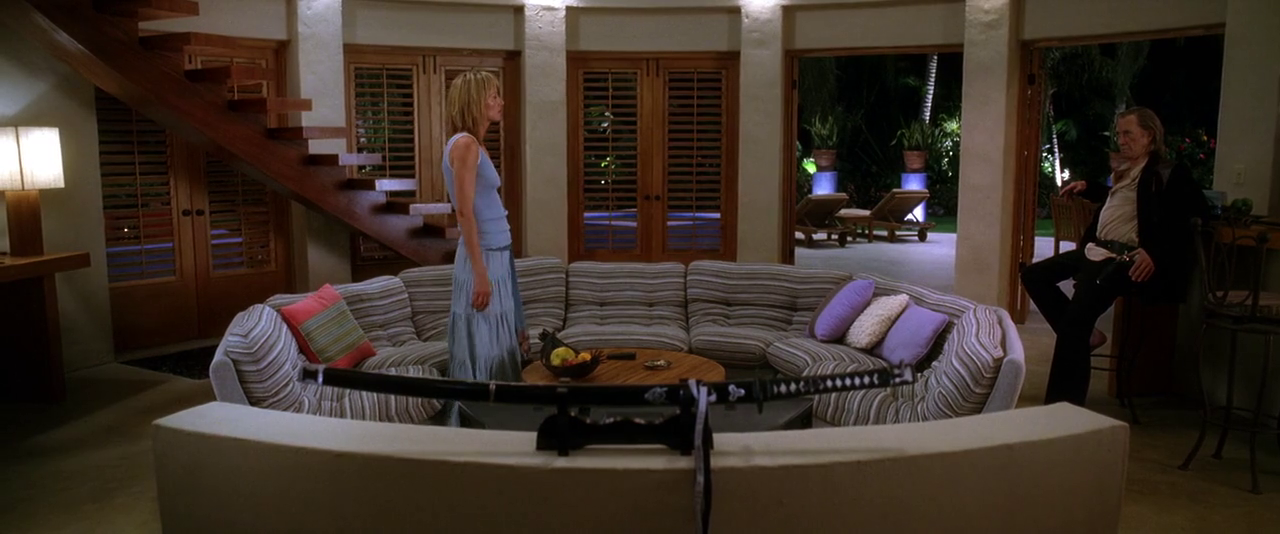

In [113]:
Image.fromarray(frame,'RGB')